In [1]:
import cv2
import os

def create_parking_lot_dataset(video_path, output_dir, grid_size=(5, 5), frame_interval=5):
    """
    Extracts frames from a video, divides each frame into grid cells, and saves each cell as an individual image.
    
    Args:
        video_path (str): Path to the input video file.
        output_dir (str): Directory where images will be saved.
        grid_size (tuple): The number of rows and columns to divide each frame (e.g., (5, 5) for 5x5 grid).
        frame_interval (int): Interval of frames to process (e.g., 5 means every 5th frame is processed).
    """
    # Open the video file
    video_capture = cv2.VideoCapture(video_path)
    if not video_capture.isOpened():
        raise ValueError("Error opening video file")
    
    # Make the output directory if it does not exist
    os.makedirs(output_dir, exist_ok=True)

    # Retrieve frame dimensions and grid cell size
    frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cell_width = frame_width // grid_size[1]
    cell_height = frame_height // grid_size[0]

    frame_count = 0
    saved_image_count = 0

    while True:
        # Read a frame from the video
        ret, frame = video_capture.read()
        if not ret:
            break

        # Process only every nth frame
        if frame_count % frame_interval == 0:
            # Divide frame into grid cells and save each cell as an image
            for row in range(grid_size[0]):
                for col in range(grid_size[1]):
                    # Calculate cell boundaries
                    x_start = col * cell_width
                    y_start = row * cell_height
                    x_end = x_start + cell_width
                    y_end = y_start + cell_height

                    # Crop the cell from the frame
                    cell = frame[y_start:y_end, x_start:x_end]

                    # Create a filename and save the image
                    cell_filename = f"frame_{frame_count}_row_{row}_col_{col}.png"
                    cell_filepath = os.path.join(output_dir, cell_filename)
                    cv2.imwrite(cell_filepath, cell)
                    saved_image_count += 1

        frame_count += 1

    # Release the video capture object
    video_capture.release()
    print(f"Saved {saved_image_count} images in {output_dir}")

# Example usage
video_path = r'C:\Users\Gowtham Ravuri\Downloads\OptiPark\1091523793-preview.mp4'# Path to your uploaded video file
output_dir = r'C:\Users\Gowtham Ravuri\Downloads\OptiPark\parkinglotimages'      # Directory to save images
create_parking_lot_dataset(video_path, output_dir, grid_size=(5, 5), frame_interval=5)


Saved 4200 images in C:\Users\Gowtham Ravuri\Downloads\OptiPark\parkinglotimages


# Importing & Loading the Data

Found 4937 images belonging to 2 classes.
Found 1234 images belonging to 2 classes.


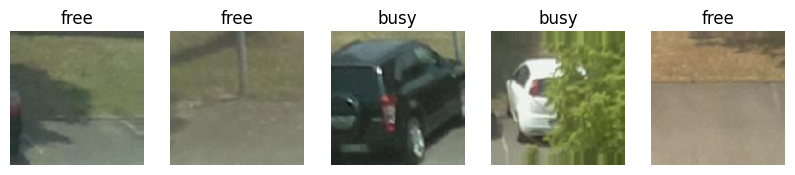

In [2]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image

# Path to the dataset directory
dataset_dir = r'C:\Users\Gowtham Ravuri\Downloads\OptiPark\CNRPark-Patches-150x150\A'  # Using raw string

# Parameters
img_height, img_width = 128, 128
batch_size = 32
epochs = 5

# Data generators for training and validation with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Preview a few images with labels
def preview_images(generator, num_images=5):
    class_names = list(generator.class_indices.keys())
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")
    plt.show()

# Preview images from the training set
preview_images(train_generator)



# Preprocessing a Random Image 

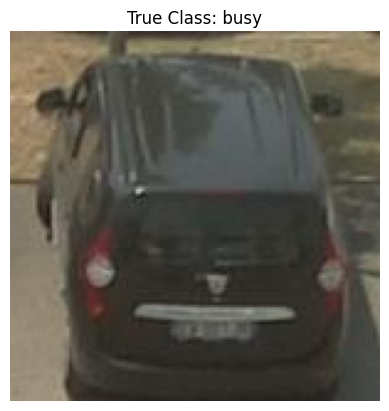

In [3]:
# Load and preprocess a random image from the dataset
def load_random_image(directory):
    class_names = os.listdir(directory)
    random_class = random.choice(class_names)
    class_dir = os.path.join(directory, random_class)
    random_image = random.choice(os.listdir(class_dir))
    img_path = os.path.join(class_dir, random_image)
    return img_path, random_class

img_path, true_class = load_random_image(dataset_dir)
img = load_img(img_path)
plt.imshow(img)
plt.title(f'True Class: {true_class}')
plt.axis('off')
plt.show()

# Resizing the Image

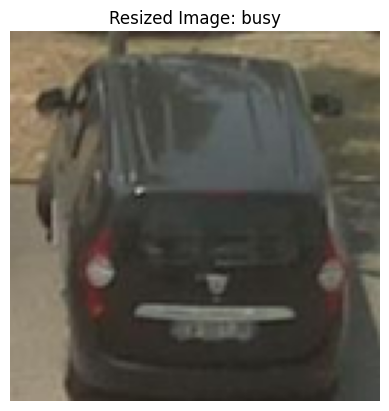

In [4]:
# Resizing the image
img_resized = img.resize((img_height, img_width))
plt.imshow(img_resized)
plt.title(f'Resized Image: {true_class}')
plt.axis('off')
plt.show()

# Normalizing the Image

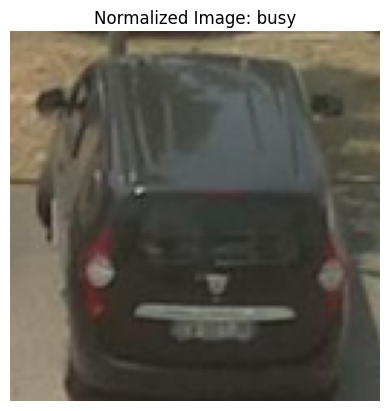

In [5]:
# Normalizing the image
img_array = img_to_array(img_resized) / 255.0
plt.imshow(img_array)
plt.title(f'Normalized Image: {true_class}')
plt.axis('off')
plt.show()

# Data Augmentation

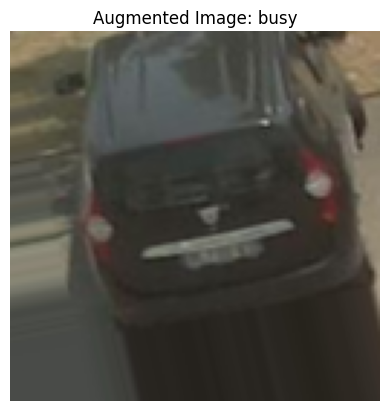

In [6]:
# Data augmentation example
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
img_augmented = datagen.random_transform(img_array)
plt.imshow(img_augmented)
plt.title(f'Augmented Image: {true_class}')
plt.axis('off')
plt.show()

# Denoised image Generation

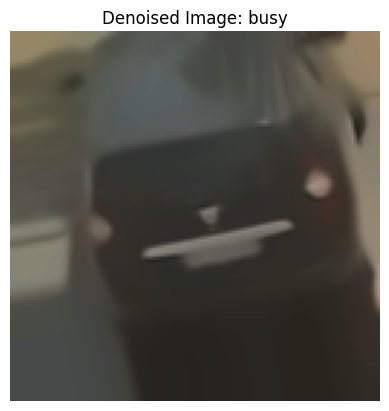

In [7]:
import cv2

# Denoising the image
img_denoised = cv2.fastNlMeansDenoisingColored((img_augmented * 255).astype(np.uint8), None, 10, 10, 7, 21)
plt.imshow(img_denoised)
plt.title(f'Denoised Image: {true_class}')
plt.axis('off')
plt.show()

# Color Space Conversion

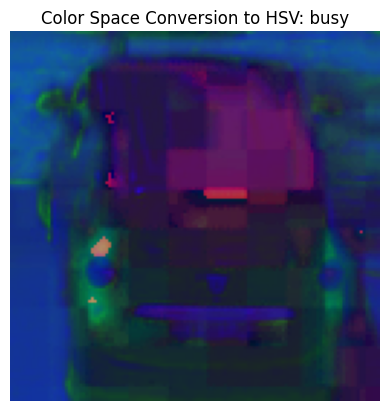

In [8]:
# Color space conversion to HSV
img_hsv = cv2.cvtColor((img_array * 255).astype(np.uint8), cv2.COLOR_RGB2HSV)
plt.imshow(img_hsv)
plt.title(f'Color Space Conversion to HSV: {true_class}')
plt.axis('off')
plt.show()

# Cropping Image

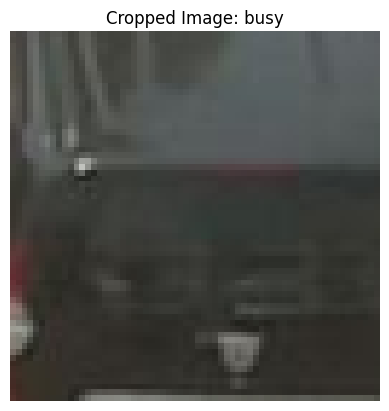

In [9]:
# Image cropping
start_row, start_col = int(img_height * .25), int(img_width * .25)
end_row, end_col = int(img_height * .75), int(img_width * .75)
img_cropped = img_array[start_row:end_row, start_col:end_col]
plt.imshow(img_cropped)
plt.title(f'Cropped Image: {true_class}')
plt.axis('off')
plt.show()

# Batch Normalization & Building a CNN Model

In [10]:
from tensorflow.keras.layers import BatchNormalization

# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)



# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)
# Evaluate the model and print the accuracy
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')


c:\Users\Gowtham Ravuri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


c:\Users\Gowtham Ravuri\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


155/155 ━━━━━━━━━━━━━━━━━━━━ 48s 298ms/step - accuracy: 0.8544 - loss: 0.2958 - val_accuracy: 0.9149 - val_loss: 0.2365
Epoch 2/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 39s 247ms/step - accuracy: 0.9819 - loss: 0.0540 - val_accuracy: 0.9724 - val_loss: 0.1129
Epoch 3/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 42s 265ms/step - accuracy: 0.9952 - loss: 0.0176 - val_accuracy: 0.9473 - val_loss: 0.1690
Epoch 4/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 41s 262ms/step - accuracy: 0.9947 - loss: 0.0127 - val_accuracy: 0.9619 - val_loss: 0.1427
Epoch 5/5
155/155 ━━━━━━━━━━━━━━━━━━━━ 40s 254ms/step - accuracy: 0.9927 - loss: 0.0223 - val_accuracy: 0.9287 - val_loss: 0.3236
39/39 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.9291 - loss: 0.2875
Validation Accuracy: 93.35%


# Prediction with Trained Model

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


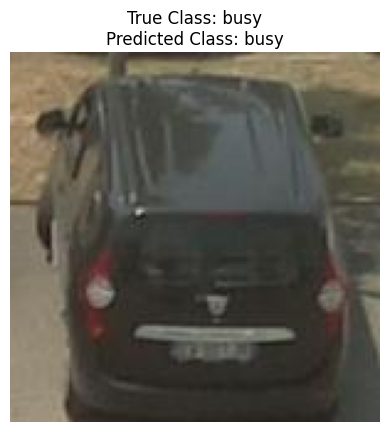

Predicted Class: busy
True Class: busy


In [11]:
# Predict with the trained model using a random example image
img_preprocessed = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_preprocessed)
predicted_class_index = np.argmax(predictions, axis=1)
predicted_class = list(train_generator.class_indices.keys())[predicted_class_index[0]]

# Display the prediction result
plt.imshow(img)
plt.title(f'True Class: {true_class}\nPredicted Class: {predicted_class}')
plt.axis('off')
plt.show()

print(f'Predicted Class: {predicted_class}')
print(f'True Class: {true_class}')

# Saving model

In [12]:
# Save the model
model.save('Parking_Classifier.h5')